<a href="https://colab.research.google.com/github/adi302/feynn-labs/blob/main/behavioral_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score




In [ ]:
# Load the dataset
file_path = "/content/HEV_article_2018.csv"
df = pd.read_csv(file_path)



In [ ]:
# Check for missing values
print("Missing Values per Column:\n", df.isnull().sum())

Missing Values per Column:
 Gender                                   0
Age                                      0
Education_level                          0
All_region                               0
All_region_recode                        0
                                        ..
av_vehicles_region_age                   0
av_vehicles_country_age                  0
count_region                             0
online_x_telework                        0
online_shopping_region_likelihoodxtel    0
Length: 165, dtype: int64


In [ ]:
# Handling missing values (Fill with median)
df.fillna(df.median(), inplace=True)

In [ ]:
#  Statistical Summary
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
              Gender           Age  Education_level    All_region  \
count  17870.000000  17870.000000     17870.000000  17870.000000   
mean       1.489871     40.535255         3.324566    167.240627   
std        0.499911     11.894582         0.731804    115.360829   
min        1.000000     16.000000         1.000000      1.000000   
25%        1.000000     30.000000         3.000000     65.000000   
50%        1.000000     41.000000         3.000000    162.000000   
75%        2.000000     49.000000         4.000000    241.000000   
max        2.000000     65.000000         4.000000    579.000000   

       All_region_recode  Employment_status  Household_members_number  \
count       17870.000000       17870.000000              17870.000000   
mean           87.554337           1.832121                  2.839899   
std            52.225007           1.493515                  1.229157   
min             1.000000           1.000000                  1.000000   

In [ ]:
# Selecting relevant features for segmentation
features = [
    'Distance_last_trip', 'Travel_time_frequent_trip', 'Speed_frequent_trip',
    'Number_vehicles_household', 'buy_electric', 'Online_shopping', 'Teleworking',
    'Income_group', 'Age', 'Education_level'
]
df_segmentation = df[features].dropna()

In [ ]:
# Standardizing data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation)


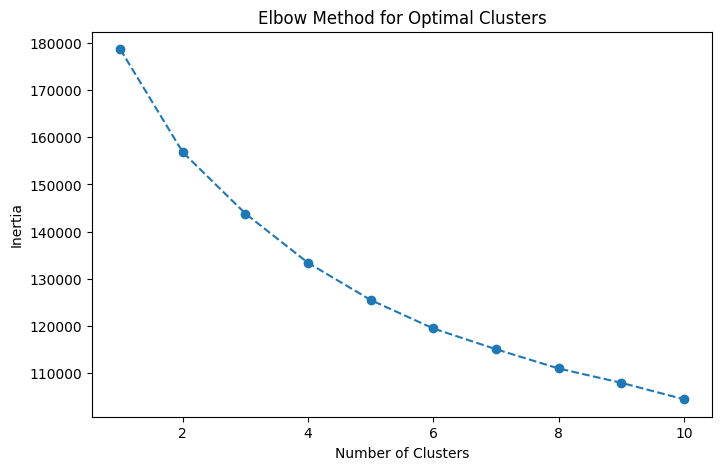

In [ ]:
# Elbow Method to find optimal clusters
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [ ]:

# Applying K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_segmentation['Cluster'] = kmeans.fit_predict(df_scaled)

In [ ]:

# Reducing dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_segmentation['PCA1'] = df_pca[:, 0]
df_segmentation['PCA2'] = df_pca[:, 1]

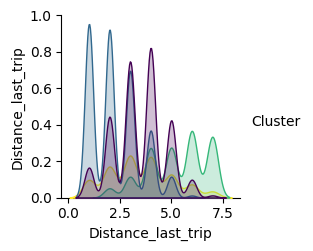

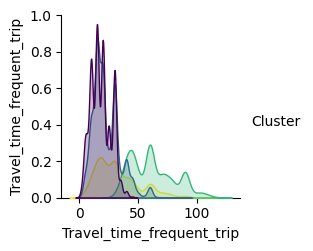

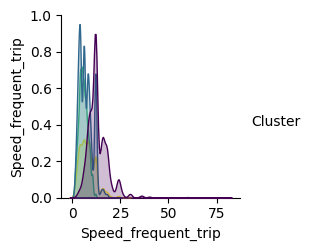

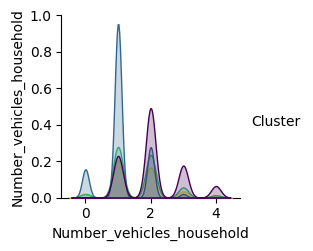

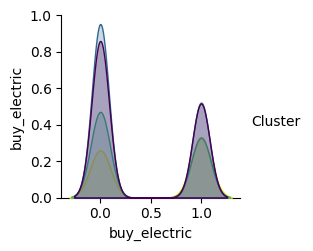

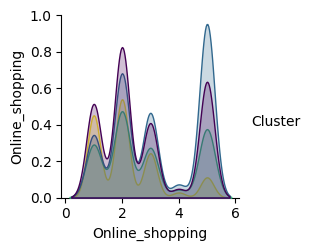

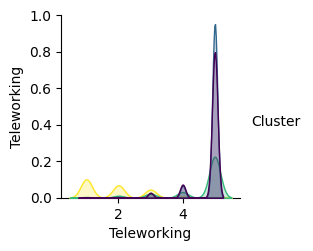

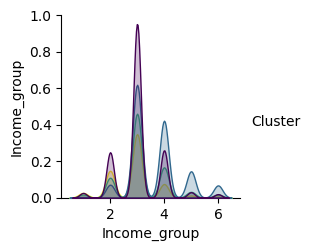

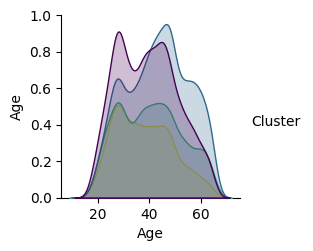

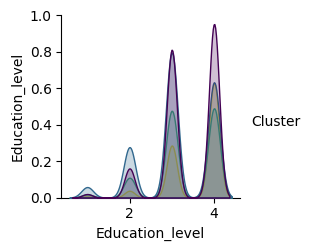

In [ ]:
# Separate pairplots for each feature
for feature in features:
    sns.pairplot(df_segmentation, hue='Cluster', vars=[feature], palette='viridis')
    plt.show()

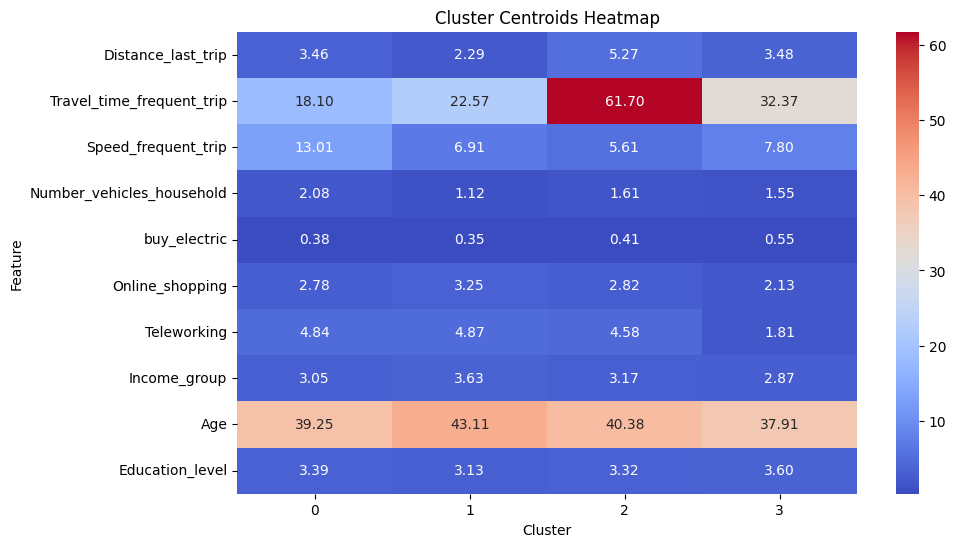

In [ ]:
# Cluster centroid visualization
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)
plt.figure(figsize=(10, 6))
sns.heatmap(centroid_df.T, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Cluster Centroids Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()



<ipython-input-19-551299c87c54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_segmentation, palette='viridis')


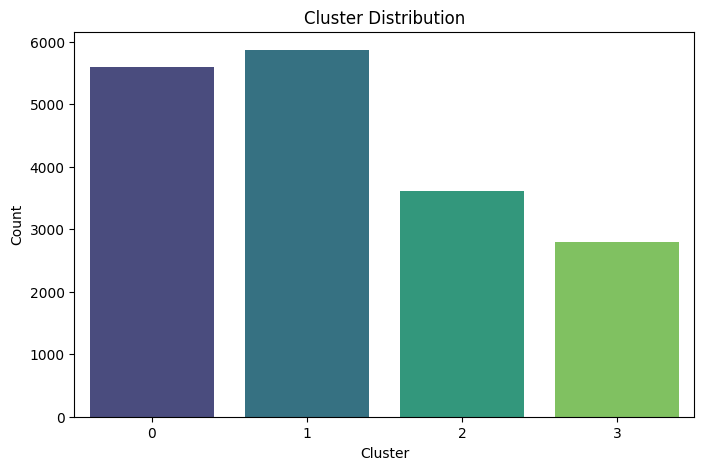

In [ ]:
# Cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df_segmentation, palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

<ipython-input-20-f10e3ccea5e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_segmentation, palette='viridis')


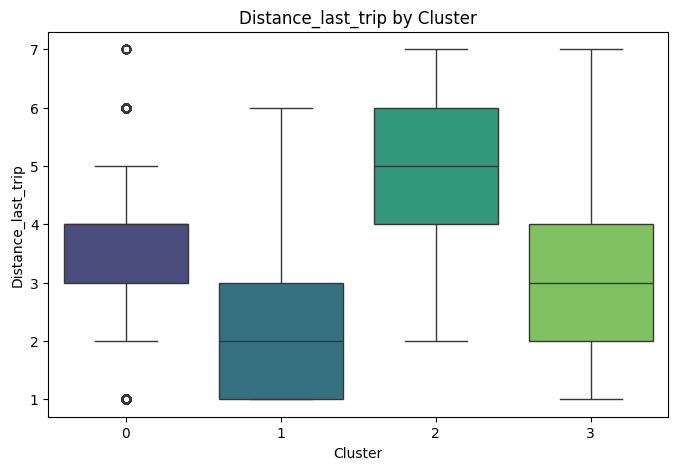

<ipython-input-20-f10e3ccea5e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_segmentation, palette='viridis')


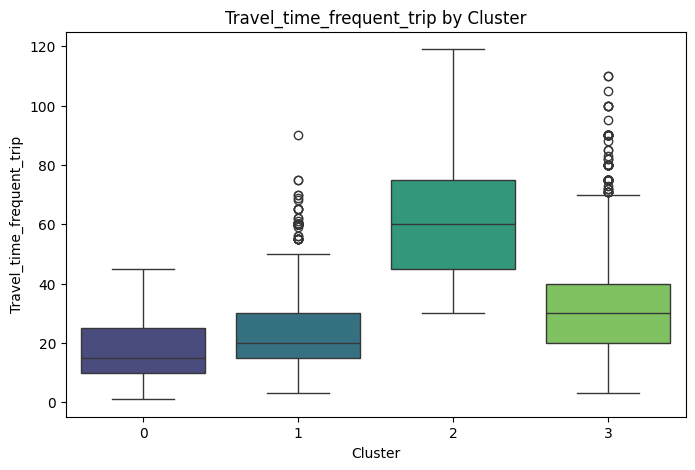

<ipython-input-20-f10e3ccea5e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_segmentation, palette='viridis')


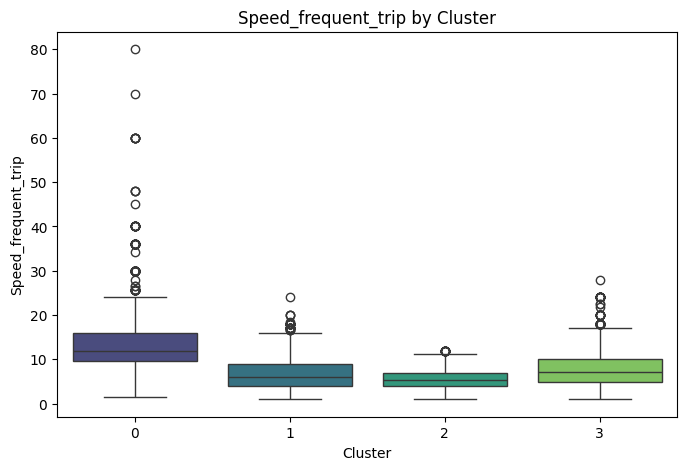

<ipython-input-20-f10e3ccea5e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_segmentation, palette='viridis')


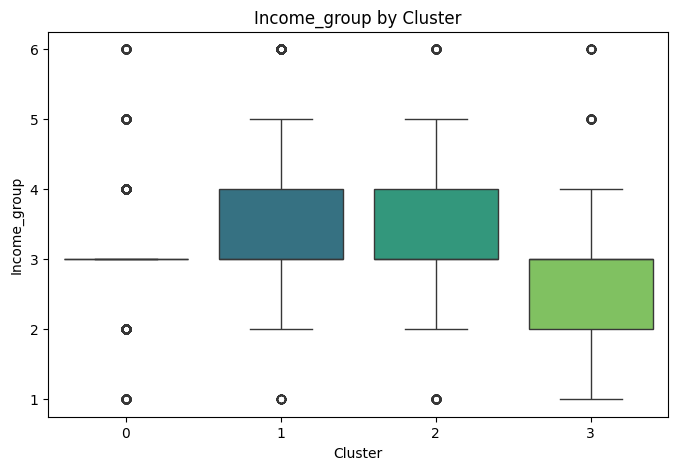

<ipython-input-20-f10e3ccea5e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df_segmentation, palette='viridis')


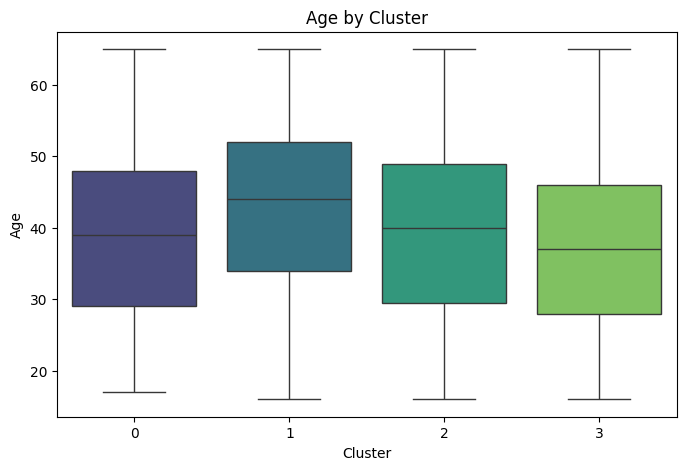

In [ ]:
# Box plots for key behavioral variables
key_features = ['Distance_last_trip', 'Travel_time_frequent_trip', 'Speed_frequent_trip', 'Income_group', 'Age']
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=df_segmentation, palette='viridis')
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

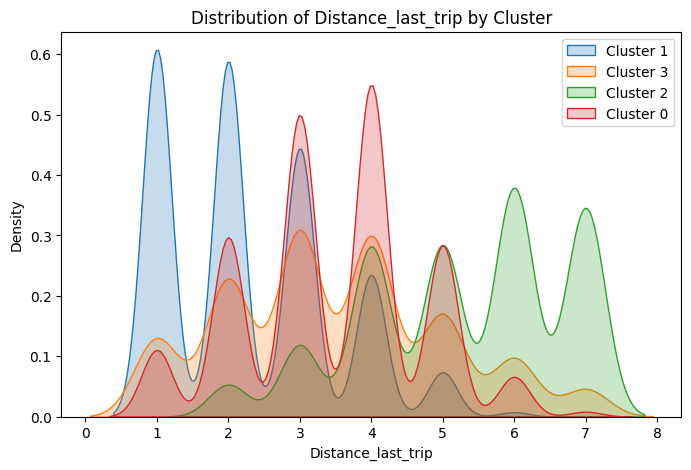

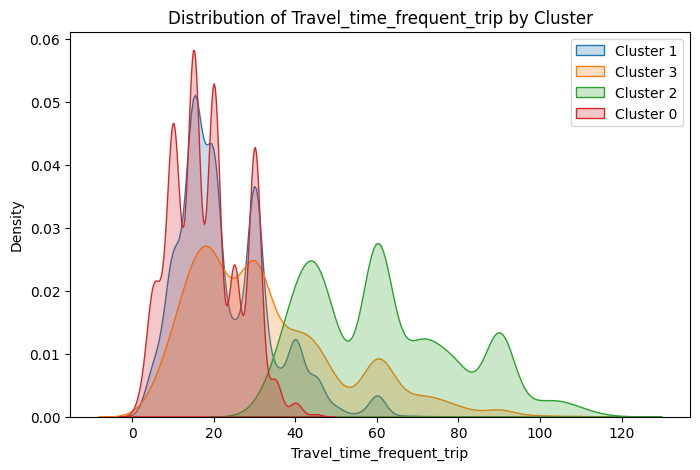

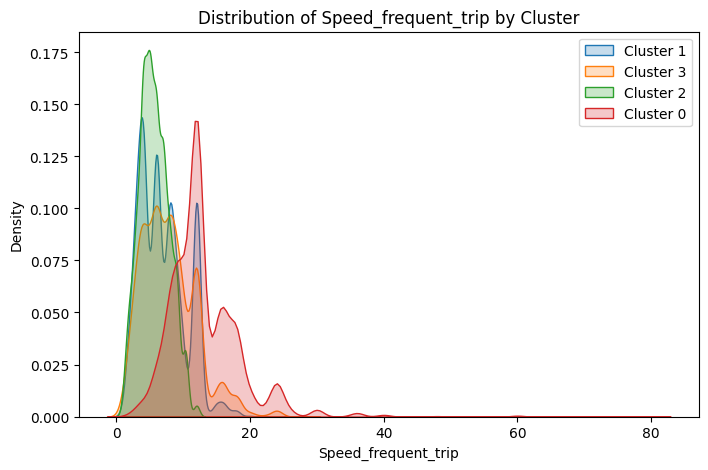

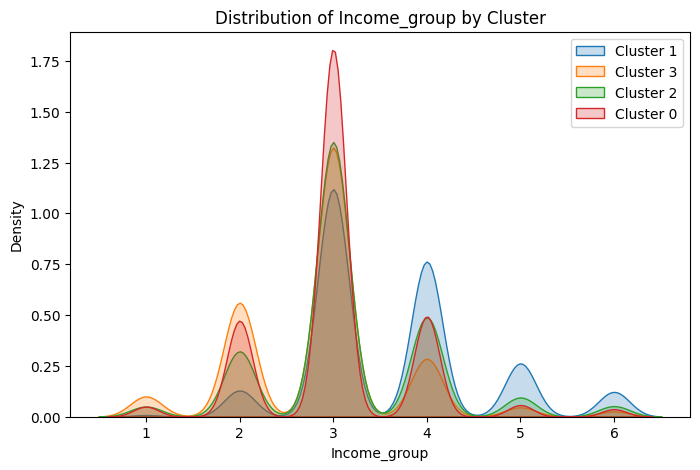

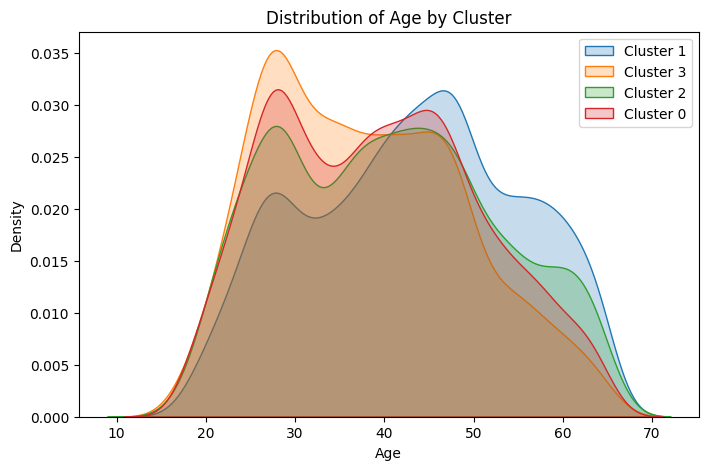

In [ ]:
# Distribution plots for key features
for feature in key_features:
    plt.figure(figsize=(8, 5))
    for cluster in df_segmentation['Cluster'].unique():
        sns.kdeplot(df_segmentation[df_segmentation['Cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [ ]:
# Silhouette Score to evaluate clustering performance
sil_score = silhouette_score(df_scaled, df_segmentation['Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.11


In [ ]:
# Feature importance via PCA explained variance
explained_variance = pca.explained_variance_ratio_
print("PCA Explained Variance Ratio:", explained_variance)

PCA Explained Variance Ratio: [0.18665209 0.1465588 ]


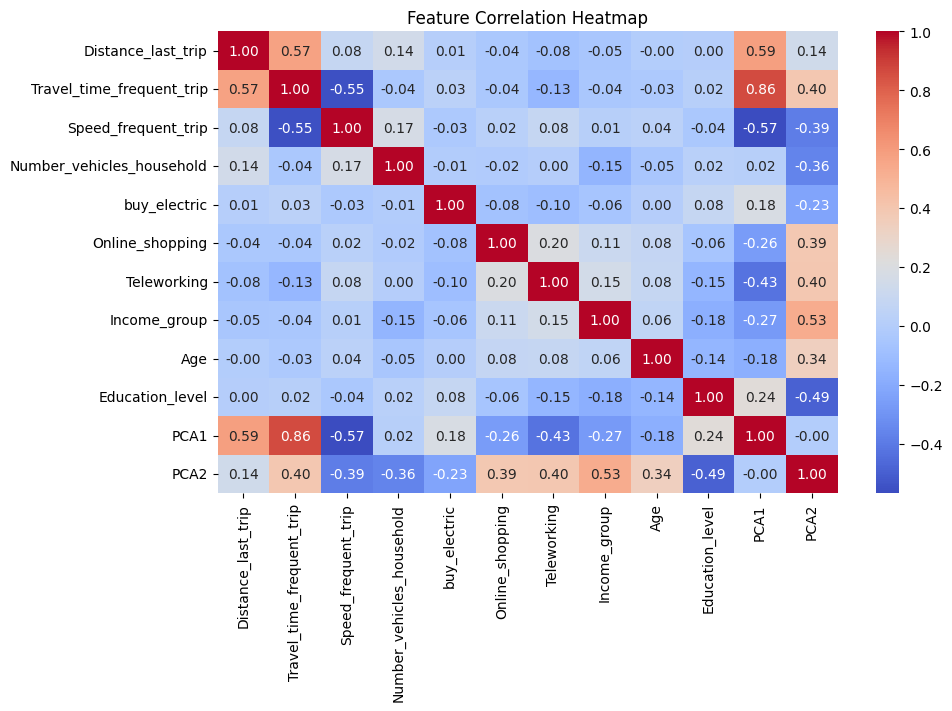

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_segmentation.drop(columns=['Cluster']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Summary statistics by cluster
cluster_summary = df_segmentation.groupby('Cluster').mean()
display(cluster_summary)

,Distance_last_trip,Travel_time_frequent_trip,Speed_frequent_trip,Number_vehicles_household,buy_electric,Online_shopping,Teleworking,Income_group,Age,Education_level,PCA1,PCA2
Cluster,,,,,,,,,,,,
0,3.457209,18.102819,13.019664,2.075576,0.375201,2.780418,4.842416,3.050563,39.262283,3.387886,-0.773570,-0.662581
1,2.283887,22.563739,6.899692,1.116454,0.353623,3.242455,4.872123,3.627621,43.096675,3.136232,-0.757503,0.680245
2,5.268603,61.668458,5.609529,1.609129,0.412448,2.821300,4.576763,3.174827,40.390595,3.316736,1.599178,0.819829
3,3.488364,32.428592,7.807076,1.547082,0.553885,2.132116,1.805227,2.869674,37.894737,3.603294,1.071034,-1.161781
